<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [2]:
import numpy as np
#전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
#연결할 리스트는 파이썬 튜플로 전달
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
#정답 데이터 생성
print(np.ones(5)) #1로 구성된 n개의 열 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #입력 받은 열들을 연결

[1. 1. 1. 1. 1.]


In [7]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(36/49, 13/49)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
0.7346938775510204 0.2653061224489796
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
print(35/49, 14/49)
print(10/13, 3/13 )

0.7142857142857143 0.2857142857142857
0.7692307692307693 0.23076923076923078


In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [14]:
print(kn.predict([[25, 150]]))

[0.]


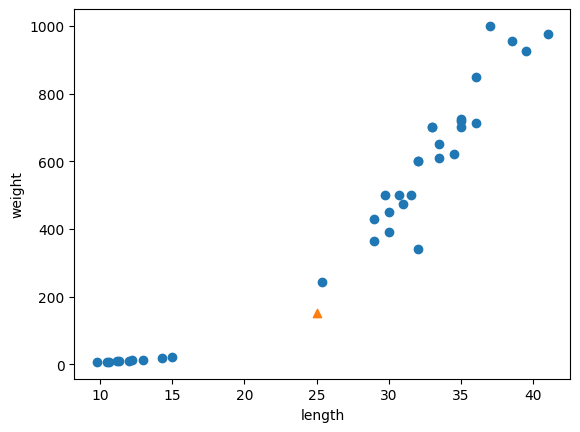

In [15]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
distances, indexes = kn.kneighbors([[25, 150]]) #주어진 샘플에서 가장 가까운 이웃을 찾아줌
#distances 이웃까지의 거리 indexes 이웃의 인덱스

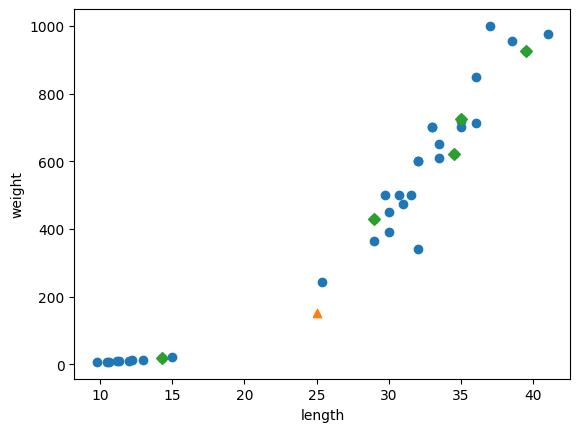

In [18]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 34.5 620. ]
  [ 35.  725. ]
  [ 29.  430. ]
  [ 14.3  19.7]
  [ 39.5 925. ]]]
[[1. 1. 1. 0. 1.]]
[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


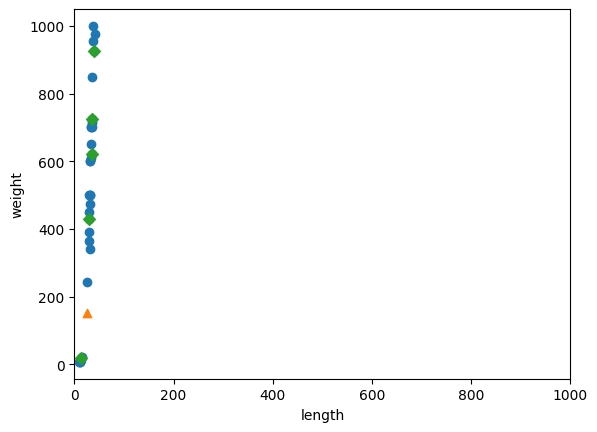

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)
train_scaled = (train_input - mean) / std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


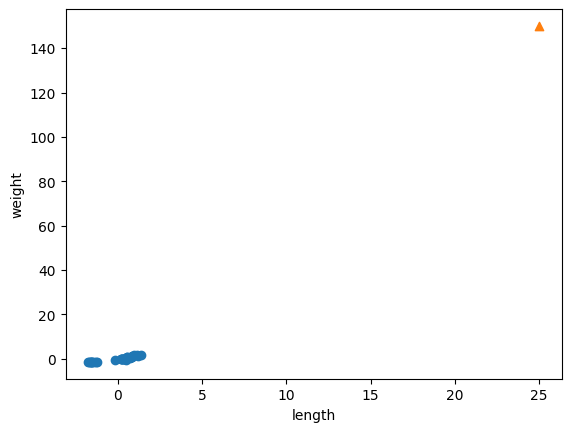

In [22]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
new = ([25, 150] - mean) / std

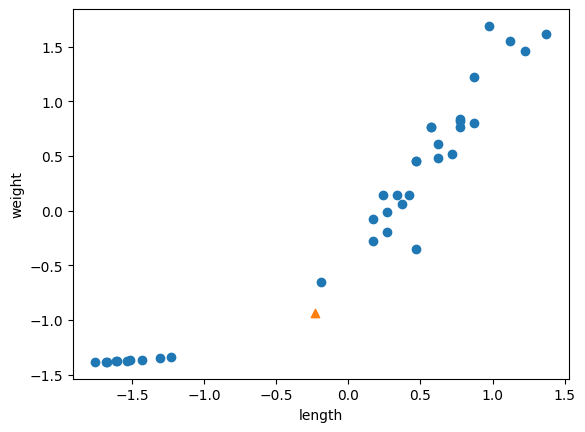

In [24]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [26]:
test_scaled = (test_input - mean) / std

In [28]:
kn.score(test_scaled, test_target)
print(kn.predict([new]))

[1.]


In [29]:
distances, indexes = kn.kneighbors([new])

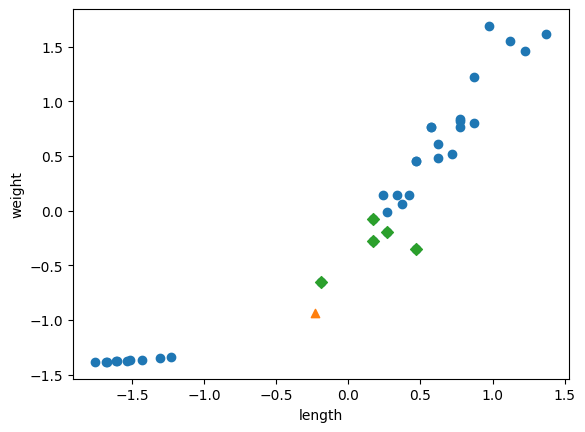

In [30]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()